# Building with LangGraph

## Building a ChatBot

In [1]:
pip install --upgrade -q openai langchain langchain-openai langchain-community langgraph 

Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
matplotlib 3.9.1 requires pillow>=8, which is not installed.
scikit-learn 1.5.1 requires joblib>=1.2.0, which is not installed.


In [2]:
from langgraph.graph import StateGraph
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI

In [3]:
# loading the API key from .env
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

In [4]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

llm = ChatOpenAI(model_name='gpt-4o-mini', temperature=0.5)

# defining the chatbot node
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

# adding the node to the graph
graph_builder.add_node("chatbot", chatbot)

# setting the entry and the finish points
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")

graph = graph_builder.compile()

## Visualizing the Graph

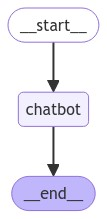

In [5]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [1]:
pip install -q grandalf

Note: you may need to restart the kernel to use updated packages.


In [7]:
print(graph.get_graph().draw_ascii())

+-----------+  
| __start__ |  
+-----------+  
      *        
      *        
      *        
 +---------+   
 | chatbot |   
 +---------+   
      *        
      *        
      *        
 +---------+   
 | __end__ |   
 +---------+   


## Running the ChatBot

In [8]:
while True:
    user_input = input('User: ')
    if user_input.lower() in ['quit', 'exit', 'bye',  'q']:
        print('Goodbye!')
        break

    for event in graph.stream({'messages': ('user', user_input)}):
        for value in event.values():
            print(f'Assistant: {value["messages"][-1].content}')
            print('-' * 20)

User:  Distance to moon in km


Assistant: The average distance from the Earth to the Moon is approximately 384,400 kilometers (about 238,855 miles). This distance can vary slightly due to the Moon's elliptical orbit around the Earth.
--------------------


User:  Paris is ...


Assistant: Paris is the capital city of France, known for its rich history, art, fashion, and culture. It's famous for iconic landmarks such as the Eiffel Tower, the Louvre Museum, Notre-Dame Cathedral, and the Champs-Élysées. The city is often referred to as "The City of Light" (La Ville Lumière) and is renowned for its vibrant atmosphere, world-class cuisine, and romantic ambiance. Paris is also a major center for art, literature, and philosophy, attracting millions of visitors each year. Would you like to know more about a specific aspect of Paris?
--------------------


User:  q


Goodbye!


## Tavily AI

In [9]:
pip install -q tavily-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

In [10]:
from tavily import TavilyClient
import os

# initializing a Tavily client
client = TavilyClient(api_key=os.environ.get('TAVILY_API_KEY'))

response = client.search(query='EUFA EURO 2024 FINAL')
response

{'query': 'EUFA EURO 2024 FINAL',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'Spain vs. England Highlights | UEFA Euro 2024 | Final',
   'url': 'https://www.foxsports.com/watch/fmc-6s3o670adn0rrlmt',
   'content': 'Check out the top moments between Spain and England in the UEFA Euro 2024 Final! JULY 14・uefa euro goals・11:23. UEFA Euro EURO - Spain vs. England - 07/14/2024 Harry Kane Nico Williams Lamine ...',
   'score': 0.9994385,
   'raw_content': None},
  {'title': 'UEFA Euro 2024 final - Wikipedia',
   'url': 'https://en.wikipedia.org/wiki/UEFA_Euro_2024_Final',
   'content': "The UEFA Euro 2024 final was a football match that determined the winners of UEFA Euro 2024.The match was the 17th final of the UEFA European Championship, a quadrennial tournament contested by the men's national teams of the member associations of UEFA to decide the champions of Europe. The match was held at the Olympiastadion in Berlin, Germany, on 14 July 2024, and

In [12]:
for result in response['results']:
    print(f"Title: {result['title']}, URL: {result['url']}")

Title: Spain vs. England Highlights | UEFA Euro 2024 | Final, URL: https://www.foxsports.com/watch/fmc-6s3o670adn0rrlmt
Title: UEFA Euro 2024 final - Wikipedia, URL: https://en.wikipedia.org/wiki/UEFA_Euro_2024_Final
Title: Spain vs England EURO 2024 final preview: Where to watch ... - UEFA.com, URL: https://www.uefa.com/euro2024/news/028f-1b597d73ac44-281bef77526d-1000--spain-vs-england-euro-2024-final-preview-where-to-watch-k/
Title: EURO 2024 final: Who was in it? When and where was it? - UEFA.com, URL: https://www.uefa.com/euro2024/news/0284-18bb952a9458-2a9e1ff202c4-1000--euro-2024-final-when-and-where-is-it/
Title: Spain 2-1 England: Late Oyarzabal winner earns La Roja ... - UEFA.com, URL: https://www.uefa.com/euro2024/news/028f-1b5e5c2b7b67-d5faab9be20b-1000--spain-2-1-england-late-oyarzabal-winner-earns-la-roja-reco/


In [13]:
response = client.search(
    query='What LLM agents?',
    search_depth='advanced',
    max_results=7,
    include_images=True,
    include_answer=True,
    include_raw_content=False
)
response

{'query': 'What LLM agents?',
 'follow_up_questions': None,
 'answer': 'LLM agents are systems that leverage Large Language Models (LLMs) to reason through problems, create plans to solve them, and execute these plans with the assistance of various tools. They combine data analysis, strategic planning, data retrieval, and learning from past actions to handle complex issues effectively. These agents can utilize a Planning Module for question-decomposition, a RAG pipeline for information retrieval, and memory modules for accurate handling of subquestions. The applications of LLM agents are diverse and can range from generating context-aware answers to solving programmatically complex tasks through code interpretation.',
 'images': ['https://promptengineering.org/content/images/2023/08/Prompt-engineering---Large-Language-Model-LLM--Autonomous-Agent-Structure---PromptEngineering.org.jpg',
  'https://gptpluginz.com/wp-content/uploads/2023/10/Screen-Shot-2023-10-30-at-2.11.50-PM-1024x562.jpg

In [14]:
answer = client.qna_search(query='Who won the UEFA Champions League in 2024?')
print(answer)

Real Madrid won the UEFA Champions League in 2024 by defeating Borussia Dortmund 2-0 in the final.


In [15]:
from langchain.adapters.openai import convert_openai_messages
from langchain_openai import ChatOpenAI

query = 'What is the "Reflection & Critique" pattern used in agentic applications and LangGraph?'

response = client.search(query, max_results=5, search_depth='advanced')['results']
response

[{'title': 'Tutorials - langchain-ai.github.io',
  'url': 'https://langchain-ai.github.io/langgraph/tutorials/',
  'content': 'Reflection & Critique¶ Basic Reflection: Prompt the agent to reflect on and revise its outputs; Reflexion: Critique missing and superfluous details to guide next steps; Language Agent Tree Search: Use reflection and rewards to drive a tree search over agents; Self-Discover Agent: Analyze an agent that learns about its own capabilities ...',
  'score': 0.98573,
  'raw_content': None},
 {'title': 'Langgraph agentic rag',
  'url': 'https://langchain-ai.github.io/langgraphjs/tutorials/rag/langgraph_agentic_rag/',
  'content': 'Langgraph agentic rag Langgraph agentic rag Table of contents Setup Load env vars Install dependencies Retriever Agent state Nodes and Edges Edges Graph See the LangSmith trace here. Langgraph crag Langgraph self rag Langgraph adaptive rag local Planning Agents Reflection & Critique How-to Guides',
  'score': 0.9823,
  'raw_content': None}]

In [16]:
# setting up the OpenAI API prompt
prompt = [
    {
        'role': 'system',
        'content': f'''You are an AI critical thinker research assistant. 
        Your sole purpose is to write well written, objective and structured reports on given text.'''
    },
    {
        'role': 'user',
        'content': f'''Information: """{response}"""
        Using the above information, answer the following query: """{query}""" in a detailed report'''
    }
]

lc_messages = convert_openai_messages(prompt)
lc_messages

[SystemMessage(content='You are an AI critical thinker research assistant. \n        Your sole purpose is to write well written, objective and structured reports on given text.'),
 HumanMessage(content='Information: """[{\'title\': \'Tutorials - langchain-ai.github.io\', \'url\': \'https://langchain-ai.github.io/langgraph/tutorials/\', \'content\': \'Reflection & Critique¶ Basic Reflection: Prompt the agent to reflect on and revise its outputs; Reflexion: Critique missing and superfluous details to guide next steps; Language Agent Tree Search: Use reflection and rewards to drive a tree search over agents; Self-Discover Agent: Analyze an agent that learns about its own capabilities ...\', \'score\': 0.98573, \'raw_content\': None}, {\'title\': \'Langgraph agentic rag\', \'url\': \'https://langchain-ai.github.io/langgraphjs/tutorials/rag/langgraph_agentic_rag/\', \'content\': \'Langgraph agentic rag Langgraph agentic rag Table of contents Setup Load env vars Install dependencies Retrieve

In [17]:
response = ChatOpenAI(model='gpt-4o-mini').invoke(lc_messages)
print(response.content)

### Report on the "Reflection & Critique" Pattern in Agentic Applications and LangGraph

#### Introduction
The "Reflection & Critique" pattern represents a methodological approach in agentic applications, particularly within the LangGraph framework. This pattern is designed to enhance the performance and adaptability of agents by enabling them to engage in self-evaluation and iterative improvement of their outputs. This report explores the components and implications of this pattern based on the information provided.

#### Overview of Reflection & Critique
The Reflection & Critique pattern consists of two primary components:

1. **Basic Reflection**: 
   - This involves prompting the agent to reflect on its outputs after executing a task. The agent is encouraged to assess its performance critically, identifying strengths and weaknesses in its responses. This self-evaluation process allows the agent to consider its reasoning and decision-making pathways, ultimately leading to improved f